<a href="https://colab.research.google.com/github/xexirina/korean_cinema/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%91%D1%83%D0%BD%D1%82%D0%BE%D0%B2%D0%B0_%D0%9A%D0%B8%D0%BD%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Корейские кинокартины на международных кинофестивалях 2000-2025 гг. Список награждений**

**Данные содержат следующие признаки:**

* `연도` - Год проведения кинофестиваля
* `영화제` - Название кинофестиваля
* `장르` - Жанр фильма
* `출품작` - Название фильма
* `감독` - Режиссер
* `출품분야` - Номинация
* `수상내역` - Награда
* `수상인` - Награжденный

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [137]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/xexirina/korean_cinema/refs/heads/main/korean_cinema_awards.csv')
raw_data

,연도,영화제,장르,출품작,감독,출품분야,수상내역,수상인
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN
2,2005,케이프타운 세계 영화제,일반(종합),올드보이,박찬욱,A Disparate World,NaN,NaN
3,2005,케이프타운 세계 영화제,일반(종합),사마리아,김기덕,A Disparate World,NaN,NaN
4,2005,케이프타운 세계 영화제,일반(종합),빈집,김기덕,A Disparate World,NaN,NaN
...,...,...,...,...,...,...,...,...
37753,2024,ONE Country ONE 국제 영화제,일반(종합),공작새,변성빈,NaN,NaN,NaN
37754,2024,네팔 국제영화제,일반(종합),공작새,변성빈,NaN,NaN,NaN
37755,2024,머내마을영화제,일반(종합),연필과 색종이,NaN,NaN,NaN,NaN
37756,2024,Fairy Tales 퀴어영화제,일반(종합),공작새,변성빈,NaN,NaN,NaN


**Для удобства изменим названия колонок на их эквивалетны на английском языке**
* `Year` - Год проведения кинофестиваля
* `Fest Name` - Название кинофестиваля
* `Genre` - Жанр фильма
* `Film` - Название фильма
* `Director` - Режиссер
* `Nomination` - Номинация
* `Award` - Награда
* `Winner` - Награжденный

  
Таким образом, наш датасет теперь выглядит следующим образом:

In [138]:
raw_data.columns = ['Year', 'Fest Name', 'Genre', 'Film', 'Director', 'Nomination', 'Award', 'Winner']
raw_data.head()

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN
2,2005,케이프타운 세계 영화제,일반(종합),올드보이,박찬욱,A Disparate World,NaN,NaN
3,2005,케이프타운 세계 영화제,일반(종합),사마리아,김기덕,A Disparate World,NaN,NaN
4,2005,케이프타운 세계 영화제,일반(종합),빈집,김기덕,A Disparate World,NaN,NaN


In [139]:
raw_data['Year'].unique() # проверим что в датасете есть данные за все года (2000-2025 гг.)

array([2005, 2004, 2003, 2002, 2001, 2000, 2010, 2009, 2008, 2007, 2006,
       2013, 2012, 2011, 2015, 2014, 2016, 2017, 2018, 2019, 2021, 2020,
       2023, 2022, 2025, 2024])

## **Датасет содержит следующие типы переменных:**

* Год проведения кинофестиваля - категориальная номинальная
* Название кинофестиваля - категориальная номинальная
* Жанр фильма - категориальная номинальная
* Название фильма - категориальная номинальная
* Режиссер - категориальная номинальная
* Номинация - категориальная номинальная
* Награда - категориальная номинальная
* Награжденный - категориальная номинальная

Не очень большое разнообразие) но позже мы расчитаем на основе этих данных числовые показатели

In [88]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37758 entries, 0 to 37757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        37758 non-null  int64 
 1   Fest Name   37758 non-null  object
 2   Genre       37684 non-null  object
 3   Film        37613 non-null  object
 4   Director    35344 non-null  object
 5   Nomination  31965 non-null  object
 6   Award       6266 non-null   object
 7   Winner      5229 non-null   object
dtypes: int64(1), object(7)
memory usage: 2.3+ MB


## **Работа с пропусками**

In [89]:
raw_data.head(3)

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN
2,2005,케이프타운 세계 영화제,일반(종합),올드보이,박찬욱,A Disparate World,NaN,NaN


In [90]:
print(f'В каждом из столбцов следущее кол-во пропусков: \n{raw_data.isna().sum()}')
print(f'\n')
print(f'Что в процентном соотношении составляет: \n{raw_data.isna().mean()*100}')

В каждом из столбцов следущее кол-во пропусков: 
Year              0
Fest Name         0
Genre            74
Film            145
Director       2414
Nomination     5793
Award         31492
Winner        32529
dtype: int64


Что в процентном соотношении составляет: 
Year           0.000000
Fest Name      0.000000
Genre          0.195985
Film           0.384025
Director       6.393347
Nomination    15.342444
Award         83.404841
Winner        86.151279
dtype: float64


### Удаление пропусков
**По правилу, мы должны удалить колонку, если в ней больше `40%` пропусков.**

**Т.е. в нашем случае, необходимо удалить колонки `Award` и `Winner`**

Однако такие данные представляют мало интереса в рамках нашего исследования (нам интересны награды), поэтому поступим следующим образом: оставим только те строки датасета, в которых значения столбцов **`Award`** и **`Winner`** **НЕ**пустые и сохраним копию в отдельный датафрейм **`df`**

In [91]:
df = raw_data.dropna(subset = ['Award', 'Winner']).copy()
df.head()

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
17,2005,디렉터스 컷 어워즈,일반(종합),너는 내 운명,박진표,NaN,올해의 여자배우상,전도연
18,2005,디렉터스 컷 어워즈,일반(종합),친절한 금자씨,박찬욱,NaN,올해의 여자배우상,이영애
19,2005,디렉터스 컷 어워즈,일반(종합),태풍태양,정재은,NaN,올해의 새로운 여자배우상,조이진
20,2005,디렉터스 컷 어워즈,일반(종합),말아톤,정윤철,NaN,올해의 신인 감독상,정윤철
21,2005,디렉터스 컷 어워즈,일반(종합),웰컴 투 동막골,박광현,NaN,올해의 남자배우상,정재영


**Полученные данные вновь проверим на долю пропущенных значений и увидим, что в колонке `Nomination` более 50% пропусков**

**-> удалим колонку**


In [92]:
 df.drop('Nomination', axis=1, inplace=True)

**Наконец у нас получился итоговый датасет, который можно начать анализировать**

In [93]:
df.head(3)

,Year,Fest Name,Genre,Film,Director,Award,Winner
17,2005,디렉터스 컷 어워즈,일반(종합),너는 내 운명,박진표,올해의 여자배우상,전도연
18,2005,디렉터스 컷 어워즈,일반(종합),친절한 금자씨,박찬욱,올해의 여자배우상,이영애
19,2005,디렉터스 컷 어워즈,일반(종합),태풍태양,정재은,올해의 새로운 여자배우상,조이진


## **Описательные статистики**

**Так как наши данные - категориальные номинальные, сначала посчитаем моду для колонок `Fest Name`, `Genre`, `Director` и `Winner`, чтобы узнать чаще всего встречающиеся названия фестиваля, жанра, режиссера и имя победителя, соответственно**

In [94]:
top_fest = raw_data['Fest Name'].mode().values[0]
print(f'Больше всего в датасете записей с фестиваля: {top_fest}') # находим самый частотный фестиваль среди всех данных
print(f'Кол-во записей: {raw_data[raw_data["Fest Name"] == top_fest].shape[0]}') # считаем кол-во упоминаний
print(f'Кол-во уникальных картин, представленных на этом фестивале: {raw_data[raw_data["Fest Name"] == top_fest]["Film"].nunique()}')

Больше всего в датасете записей с фестиваля: 서울독립영화제
Кол-во записей: 1613
Кол-во уникальных картин, представленных на этом фестивале: 1557


In [95]:
top_fest_byaw_num = df['Fest Name'].mode().values[0]
print(f'Больше всего наград получено на фестивале: {top_fest_byaw_num}') # находим самый частотный фестиваль среди данных о награждении кор фильмов
print(f'Кол-во записей: {df[df["Fest Name"] == top_fest_byaw_num].shape[0]}') # считаем кол-во упоминаний
print(f'Из низ уникальных картин: {raw_data[raw_data["Fest Name"] == top_fest_byaw_num]["Film"].nunique()}')

Больше всего наград получено на фестивале: 청룡영화상
Кол-во записей: 396
Из низ уникальных картин: 239


In [96]:
print(raw_data['Genre'].mode().values[0]) # находим самый популярный жанр в обоих датафремах
print(df['Genre'].mode().values[0])

일반(종합)
일반(종합)


In [97]:
top_dir_raw = raw_data['Director'].mode().values[0]
print(f'Чаще всего на фестивалях были представлены фильмы режиссера {top_dir_raw}')
print(f'Процент его успешных картин: ' # посчитаем сколько из всех представленных им фильмов получили награду (%)
      f'{round(df[df["Director"] == top_dir_raw].shape[0] / raw_data[raw_data["Director"] == top_dir_raw].shape[0] * 100, 2)} %')

Чаще всего на фестивалях были представлены фильмы режиссера 홍상수
Процент его успешных картин: 6.66 %


In [98]:
top_dir_award = df['Director'].mode().values[0]
print(f'Самый успешный режиссер: {top_dir_award}')

Самый успешный режиссер: 봉준호


In [99]:
print(f'Обладатель наибольшего кол-ва наград: {raw_data["Winner"].mode().values[0]}')
# находим обладателя наибольшего кол-ва наград (одинаково для обоих сетов, поэтому не дублируем)

Обладатель наибольшего кол-ва наград: 봉준호


In [100]:
best_dir_filmography = raw_data[raw_data["Director"] == top_dir_award]["Film"].unique()
print(f'Фильмы самого успешного режиссера: {(", ").join(best_dir_filmography)}; всего {len(best_dir_filmography)} шт.')
print(f'Из них награды получили следующие фильмы: {(", ").join(df[df["Director"] == top_dir_award]["Film"].unique())}, '
      f'{df[df["Director"] == top_dir_award]["Film"].nunique()} шт.')


Фильмы самого успешного режиссера: 살인의 추억, 괴물, 플란다스의 개, 마더, 인플루엔자, 지리멸렬, 설국열차, 기생충; всего 8 шт.
Из них награды получили следующие фильмы: 살인의 추억, 플란다스의 개, 마더, 괴물, 설국열차, 기생충, 6 шт.


In [101]:
print(f'Всего работы самого титулованного режиссера получили {df[df["Director"] == top_dir_award]["Film"].count()} наград ',
      f'\n{df[df["Director"] == top_dir_award]["Film"].value_counts()}')

Всего работы самого титулованного режиссера получили 148 наград  
Film
기생충        76
살인의 추억     24
괴물         19
마더         18
설국열차        8
플란다스의 개     3
Name: count, dtype: int64


### **Итак, мы узнали, что:**

* наибольшее количество корейских фильмов за рассматриваемый период было представлено на Seoul Independent Film Festival (**서울독립영화제**) — **`1557`** картин;
* за последние 25 лет корейские фильмы чаще всего получали награды на кинопремии "Голубой дракон" (**청룡영화상**) — **`396`** раз;
* самыми популярными среди фильмов, получивших награды, стали коммерческие (**일반(종합)**) фильмы;
* чаще всего на фестивалях участвовали фильмы, снятые режиссером Хон Сансу (**홍상수**), однако только **`6,66%`** из них были удостоены наград;
* больше всего наград получили фильмы, снятые режиссёром Пон Чжунхо (**봉준호**). Он же стал самым **титулованным** участником, завоевав **`67`** наград (предположительно, это премии за лучшую режиссёрскую работу (감독상) или за лучший сценарий (각본상) — точнее узнаем позже, обратившись к колонке **`Award`**);
* самым высоко оцененным фильмом стали **"Паразиты" (기생충)**, удостоившиеся **`76`** наград.

## **Для дальнейшего анализа необходимо создать дополнительные количественные признаки, расчитанные на основе имеющихся категориальных данных**

**Сначала хочется избавиться от очевидно экстремальных значений, полученных в результате использования в датасете данных за 2025 г.**

В виду того, что год только начался, данные за него будут неполными, иметь экстремально низкие показатели (выбросы). Поэтому избавимся от этих данных сразу

**Создадим таблицу с данными по годам на основе имеющихся датафреймов.**  

В таблице будут следующие показатели:  

- **`Awards`** – количество фильмов, номинированных в этом году.  
- **`Winners`** – общее число наград, полученных фильмами за год.  
- **`Win_to_Aw`** – отношение побед к номинациям.  
- **`Rec_num`** – количество записей об участии в фестивалях.
- **`Fest_Unum`** – количество уникальных фестивалей, проведенных в этом году.
- **`Film_UNnum`** – количество уникальных фильмов, представленных на фестивалях.
- **`Best_Director`** (**BDA**) – режиссёр, получивший больше всего наград в этом году.  
- **`BDA_num`** – количество наград, полученных **Best_Director** за год.
- **`BDAll_num`** – количество фильмов **Best_Director**, участвующих в фестивалях за год.
- **`BDALL_AW_Ration`** – отношение фильмов **Best_Director**, получивших награду к обшему число его фильмах, участвующих в этом году (`BDA_num / BDAll_num`).
- **`BDA_Share`** – доля наград **Best_Director** от общего числа наград за год (`BDA_num / Winners`).  
- **`Most_Shown_Director`** (**MSD**) – режиссёр, чьи фильмы чаще всего участвовали в фестивалях в этом году (независимо от наград).  
- **`MSDW_num`** – количество фильмов **Most_Shown_Director**, представленных на фестивалях.  
- **`MSDW_Share`** – доля фильмов **Most_Shown_Director** от общего числа номинированных фильмов (`MSDW_num / Awards`).  


In [102]:
yearly_aw = raw_data.groupby('Year')[['Award', 'Winner']].count()
yearly_aw['Rec_num'] = raw_data.groupby('Year')['Fest Name'].count()
yearly_aw['Fest_Unum'] = raw_data.groupby('Year')['Fest Name'].nunique()
yearly_aw['Film_UNnum'] = raw_data.groupby('Year')['Film'].nunique()
yearly_aw['Best_Director'] = df.groupby('Year')['Director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
yearly_aw['Most_Shown_Director'] = raw_data.groupby('Year')['Director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

yearly_aw['BDA_num'] = yearly_aw.apply(
    lambda row: raw_data[(raw_data['Year'] == row.name) & (raw_data['Director'] == row['Best_Director']) & (raw_data['Winner'].isna()==False)].shape[0], axis=1
) # BDA_num == Best_Director_Awards_num

yearly_aw['BDAll_num'] = yearly_aw.apply(
    lambda row: raw_data[(raw_data['Year'] == row.name) & (raw_data['Director'] == row['Best_Director'])].shape[0], axis=1
) # BDA_num == Best_Director_Awards_num

yearly_aw['MSDW_num'] = yearly_aw.apply(
    lambda row: raw_data[(raw_data['Year'] == row.name) & (raw_data['Director'] == row['Most_Shown_Director'])].shape[0], axis=1
) # MSDW_num == Most_Shown_Director_Works_num

yearly_aw['Win_to_Aw'] = yearly_aw['Winner'] / yearly_aw['Award']
yearly_aw['BDA_Share'] = yearly_aw['BDA_num'] / yearly_aw['Winner']
yearly_aw['MSDW_Share'] = yearly_aw['MSDW_num'] / yearly_aw['Film_UNnum']
yearly_aw['BDALL_AW_Ration'] = yearly_aw['BDA_num'] / yearly_aw['BDAll_num']

yearly_aw = yearly_aw[['Award', 'Winner', 'Win_to_Aw', 'Rec_num', 'Fest_Unum', 'Film_UNnum', 'Best_Director', 'BDAll_num', 'BDA_num',
                       'BDALL_AW_Ration', 'BDA_Share', 'Most_Shown_Director', 'MSDW_num', 'MSDW_Share']]
yearly_aw.columns = ['Awards', 'Winners', 'Win_to_Aw', 'Rec_num', 'Fest_Unum', 'Film_UNnum', 'Best_Director', 'BDAll_num', 'BDA_num',
                     'BDALL_AW_Ration', 'BDA_Share', 'Most_Shown_Director', 'MSDW_num', 'MSDW_Share']


yearly_aw.head() # надо посчитать сколько раз встречался каждый реж и построить график


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085
2002,96,86,0.895833,362,105,110,이창동,19,14,0.736842,0.162791,김기덕,48,0.436364
2003,135,108,0.800000,530,182,147,봉준호,31,23,0.741935,0.212963,봉준호,31,0.210884
2004,153,126,0.823529,581,168,183,박찬욱,52,34,0.653846,0.269841,김기덕,54,0.295082


### Теперь посчитаем описательные статистики для полученных числовых данных

In [103]:
print(f'В среднем за год в номинации попадало {round(yearly_aw["Awards"].mean())} корейских фильмов')
print(f'В среднем за год корейские авторы забирали по {round(yearly_aw["Winners"].mean())} наград')
print(f'В среднем за год появлялось по {round(yearly_aw["Rec_num"].mean())} записей')
print(f'В среднем за год проводилось {round(yearly_aw["Fest_Unum"].mean())} фестивалей')

В среднем за год в номинации попадало 241 корейских фильмов
В среднем за год корейские авторы забирали по 201 наград
В среднем за год появлялось по 1452 записей
В среднем за год проводилось 234 фестивалей


## **Изучение признаков**

У нас есть два датафрейма: **`raw_data`** и **`df`**.

* `raw_data` содержит информацию обо всех фильмах, представленных на различных кинофестивалях с 2000 по 2025 год.
* `df` включает только те фильмы, которые получили награды на этих фестивалях.


Логично рассмотреть данные с **двух** сторон:

1.   Сравнить оба датафрейма, чтобы понять, чем награжденные фильмы отличаются от остальных.
2.   Проанализировать каждый датафрейм отдельно, выявляя закономерности внутри них


### Категориальные данные

In [104]:
raw_data.head(2)

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN


In [105]:
print(f'Всего за 25 лет зафиксированы данные о {raw_data["Director"].nunique()} южнокорейских режиссерах, представивших свои фильмы на международных фестивалях')
print(f'Картины только {df["Director"].nunique()} из них были удостоены наград')
print(f'\nТаким образом, {raw_data["Director"].nunique() - df["Director"].nunique()} киноделов не получили международного признания своих работ')

Всего за 25 лет зафиксированы данные о 5244 южнокорейских режиссерах, представивших свои фильмы на международных фестивалях
Картины только 1459 из них были удостоены наград

Таким образом, 3785 киноделов не получили международного признания своих работ


In [106]:
print(f'Количество уникальных наименований фестивалей: {raw_data["Fest Name"].nunique()}') # количество уникальных наименований фестивалей
print(f'Количество уникальных наименований фестивалей, на которых были награждены кор. фильмы: {df["Fest Name"].nunique()}')

Количество уникальных наименований фестивалей: 1303
Количество уникальных наименований фестивалей, на которых были награждены кор. фильмы: 401


In [107]:
print(f'Топ-10 фестивалей по кол-во записей о фильмах, представленных на них за 25 лет: ',
      f'\n{raw_data["Fest Name"].value_counts().head(10)}') # Топ-5 фестивалей по кол-во записей о фильмах, представленных на них за 25 лет

print(f'\n')

print(f'Топ-10 фестивалей, на которых высоко ценятся корейские картины: ',
      f'\n{df["Fest Name"].value_counts().head(10)}')

Топ-10 фестивалей по кол-во записей о фильмах, представленных на них за 25 лет:  
Fest Name
서울독립영화제        1613
부천국제판타스틱영화제    1096
부산국제영화제        1045
전주국제영화제         895
서울국제여성영화제       674
피렌체 한국영화제       625
대단한 단편영화제       587
미쟝센 단편영화제       528
대구단편영화제         519
정동진독립영화제        483
Name: count, dtype: int64


Топ-10 фестивалей, на которых высоко ценятся корейские картины:  
Fest Name
청룡영화상         396
한국영화평론가협회상    239
대종상영화제        225
백상예술대상        221
황금촬영상 시상식     185
부일영화상         175
부산영화평론가협회상    167
디렉터스 컷 어워즈    159
서울독립영화제       149
춘사영화제         147
Name: count, dtype: int64


In [108]:
raw_data['Film'].nunique() # кол-во уникальных фильмов, представленных на фестивалях за последние 25 лет

11103

In [109]:
df['Film'].nunique() # кол-во уникальных фильмов, награжденных на фестивалях за последние 25 лет

2101

In [110]:
print(raw_data['Genre'].nunique())  # надо построить что-то и принять решение о полезности данных, тк в большинстве случаев как будто просто писали 일반(종합)
print(", ".join(map(str, raw_data['Genre'].unique())))

10
일반(종합), 독립, 청소년, nan, 단편, 애니, 기타, 판타지, 퀴어, 호러/스릴러, 다큐


In [111]:
dir_intersection = list(pd.Index(yearly_aw["Best_Director"]).intersection(pd.Index(yearly_aw["Most_Shown_Director"])))

print(f'Режиссеры, оказавшиеся за эти годы и в категории самых успешных и самых часто появляюзихся: ',
 f'\n{(", ").join(dir_intersection)}')

Режиссеры, оказавшиеся за эти годы и в категории самых успешных и самых часто появляюзихся:  
이창동, 봉준호, 나홍진, 양우석, 장재현


### Числовые данные

In [112]:
print(f'Меньше всего номинаций у корейских фильмов было в {yearly_aw.idxmin()["Awards"]} '
      f'г. — {yearly_aw["Awards"].min()} шт.')
print(f'Больше всего номинаций у корейских фильмов было в {yearly_aw.idxmax()["Awards"]} '
      f'г. — {yearly_aw["Awards"].max()} шт.')

Меньше всего номинаций у корейских фильмов было в 2025 г. — 16 шт.
Больше всего номинаций у корейских фильмов было в 2018 г. — 613 шт.


In [113]:
print(f'Меньше всего наград корейские фильмы получили в {yearly_aw.idxmin()["Winners"]} '
      f'г. — {yearly_aw["Winners"].min()} шт.')
print(f'Больше всего наград корейские фильмы получили в  {yearly_aw.idxmax()["Winners"]} '
      f'г. — {yearly_aw["Winners"].max()} шт.')


Меньше всего наград корейские фильмы получили в 2025 г. — 16 шт.
Больше всего наград корейские фильмы получили в  2018 г. — 573 шт.


In [114]:
print(f'Меньше всего записей - {yearly_aw["Rec_num"].min()} шт. - было сделано в {yearly_aw.idxmin()["Rec_num"]} г.')
print(f'Наибольшая активность корейских кинематографистов на фестивалях была в {yearly_aw.idxmax()["Rec_num"]} '
      f'г., \nтогда было сделано {yearly_aw["Rec_num"].max()} записей об участии фильмов в фестивалях')

Меньше всего записей - 93 шт. - было сделано в 2025 г.
Наибольшая активность корейских кинематографистов на фестивалях была в 2019 г., 
тогда было сделано 3338 записей об участии фильмов в фестивалях


In [115]:
print(f'Меньше всего фестивалей было проведено в {yearly_aw.idxmin()["Fest_Unum"]} '
      f'г. — {yearly_aw["Fest_Unum"].min()} шт.')
print(f'Больше всего фестивалей было проведено в {yearly_aw.idxmax()["Fest_Unum"]} '
      f'г. — {yearly_aw["Fest_Unum"].max()} шт.')

# здесь надо понимать, что это условная запись, тк речь идет только о фестивалях,
# на которых участвовали кор фильмы

Меньше всего фестивалей было проведено в 2025 г. — 18 шт.
Больше всего фестивалей было проведено в 2021 г. — 407 шт.


In [116]:
print(f'Меньше всего уникальных фильмов было показано в {yearly_aw.idxmin()["Film_UNnum"]} '
      f'г. — {yearly_aw["Film_UNnum"].min()} шт.')
print(f'Больше всего уникальных фильмов было показано в {yearly_aw.idxmax()["Film_UNnum"]} '
      f'г. — {yearly_aw["Film_UNnum"].max()} шт.')

Меньше всего уникальных фильмов было показано в 2025 г. — 76 шт.
Больше всего уникальных фильмов было показано в 2024 г. — 1607 шт.


In [117]:
# надо будет посмотреть что там в 2001 году

## **Выбросы и ошибки**

In [118]:
yearly_aw.head(2)

,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085


In [125]:
q1_awards = yearly_aw['Awards'].quantile(0.25)
q3_awards = yearly_aw['Awards'].quantile(0.75)
iqr = q3_awards - q1_awards
lower_bound = q1_awards - 1.5 * iqr
upper_bound = q3_awards + 1.5 * iqr
print(lower_bound, upper_bound)

yearly_aw[(yearly_aw['Awards'] > upper_bound) | (yearly_aw['Awards'] < lower_bound)] # ура выброс

-135.0 593.0


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2018,613,573,0.934747,3310,402,1578,장준환,39,24,0.615385,0.041885,홍상수,86,0.054499


In [120]:
q1_wa = yearly_aw['Win_to_Aw'].quantile(0.25)
q3_wa = yearly_aw['Win_to_Aw'].quantile(0.75)
iqr_wa = q3_wa - q1_wa
lower_bound_wa = q1_wa - 1.5 * iqr_wa
upper_bound_wa = q3_wa + 1.5 * iqr_wa
print(lower_bound_wa, upper_bound_wa)

yearly_aw[(yearly_aw['Win_to_Aw'] < lower_bound_wa) |(yearly_aw['Win_to_Aw'] > upper_bound_wa)] # выброс

0.6679951504932208 1.0356943570211028


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2022,386,179,0.463731,2474,321,1220,이수학,20,20,1.0,0.111732,홍상수,63,0.051639


In [128]:
q1_bda_share = yearly_aw['BDA_Share'].quantile(0.25)
q3_bda_share = yearly_aw['BDA_Share'].quantile(0.75)
iqr_bda = q3_bda_share - q1_bda_share
lower_bound_bda = q1_bda_share - 1.5 * iqr_bda
upper_bound_bda = q3_bda_share + 1.5 * iqr_bda
print(lower_bound_bda, upper_bound_bda)

yearly_aw[(yearly_aw['BDA_Share'] < lower_bound_bda)|(yearly_aw['BDA_Share'] > upper_bound_bda)] # 2025 год выброс

-0.05485542498051696 0.2924130355938389


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2025,16,16,1.0,93,18,76,장재현,12,11,0.916667,0.6875,장재현,12,0.157895


In [130]:
avg_bda_share = yearly_aw['BDA_Share'].mean()
std_bda_share = yearly_aw['BDA_Share'].std()
print(avg_bda_share, std_bda_share)

lower_bound_bda_share = avg_bda_share - 2 * std_bda_share
upper_bound_bda_share = avg_bda_share + 2 * std_bda_share
print(lower_bound_bda_share, upper_bound_bda_share)

yearly_aw[(yearly_aw['BDA_Share'] < lower_bound_bda_share) | (yearly_aw['BDA_Share'] > upper_bound_bda_share)]
# наконец можем официально избавиться от 2025 г.
# мешает нашей статистике, тк очень высокое отношение работ лучшего режиссера ко всем наград из-за маленького кол-ва наблюдений

0.1346877882162831 0.12843995691809776
-0.12219212561991241 0.3915677020524786


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2025,16,16,1.0,93,18,76,장재현,12,11,0.916667,0.6875,장재현,12,0.157895


In [135]:
raw_data.drop(raw_data[raw_data['Year'] == 2025].index, inplace=True)
raw_data['Year'].unique() # убедимся, что данных за 2025 год больше нет

array([2005, 2004, 2003, 2002, 2001, 2000, 2010, 2009, 2008, 2007, 2006,
       2013, 2012, 2011, 2015, 2014, 2016, 2017, 2018, 2019, 2021, 2020,
       2023, 2022, 2024])

## **Анализ корреляций**

In [124]:
yearly_aw.corr(numeric_only = True)

,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,MSDW_num,MSDW_Share
Awards,1.000000,0.961251,-0.102577,0.946032,0.879600,0.914393,0.562897,0.495655,-0.378743,-0.529283,0.675399,-0.565802
Winners,0.961251,1.000000,0.159493,0.888130,0.812534,0.843769,0.632120,0.534335,-0.444760,-0.494220,0.672963,-0.504607
Win_to_Aw,-0.102577,0.159493,1.000000,-0.173109,-0.281561,-0.204149,0.210600,0.134202,-0.164156,0.268665,-0.005909,0.177463
Rec_num,0.946032,0.888130,-0.173109,1.000000,0.871320,0.990697,0.474836,0.321668,-0.504684,-0.581689,0.605396,-0.676248
Fest_Unum,0.879600,0.812534,-0.281561,0.871320,1.000000,0.836374,0.471715,0.378730,-0.443765,-0.656897,0.752654,-0.620386
Film_UNnum,0.914393,0.843769,-0.204149,0.990697,0.836374,1.000000,0.412868,0.255784,-0.489384,-0.564740,0.536432,-0.706146
BDAll_num,0.562897,0.632120,0.210600,0.474836,0.471715,0.412868,1.000000,0.899927,-0.563361,-0.104050,0.460864,-0.166863
BDA_num,0.495655,0.534335,0.134202,0.321668,0.378730,0.255784,0.899927,1.000000,-0.255529,0.011635,0.417332,-0.040838
BDALL_AW_Ration,-0.378743,-0.444760,-0.164156,-0.504684,-0.443765,-0.489384,-0.563361,-0.255529,1.000000,0.342468,-0.242234,0.351394
BDA_Share,-0.529283,-0.494220,0.268665,-0.581689,-0.656897,-0.564740,-0.104050,0.011635,0.342468,1.000000,-0.424115,0.381574


**Проанализируем матрицу корелляций**

По матрице можно заметить:
* сильную положительную корелляцию между кол-вом номинаций  **`Awards`**, наград **`Winners`** и кол-вом проводимых фестивалей **`Fest_Unum`**, представленных фильмов **`Film_UNnum`** *-> (прямая линейная взаимосвязь)*

* сильную отрицательную корелляцию между кол-вом записей **`Rec_num`**, уникальных фильмов **`Film_UNnum`** и долей, которую от них занимают данные о фильмах топ-режиссеров данного года **`(BDA_Share)`** (чем больше фильмов, тем меньшую долю из низ составляют фильмы самого успешного автора) *-> (обратная линейная взаимосвязь)*

## **Визуализация данных**

<Axes: >

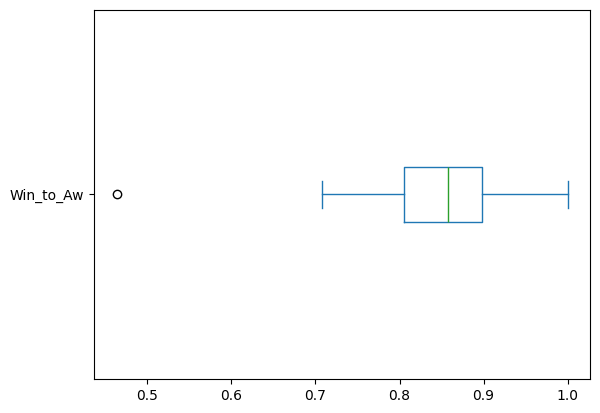

In [134]:
yearly_aw['Win_to_Aw'].plot(kind = 'box', vert = False) # нашли выброс

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

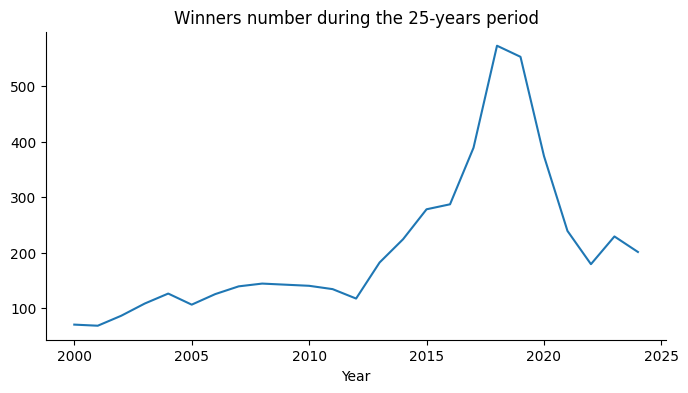

In [44]:
yearly_aw['Winners'].plot(kind='line', figsize=(8, 4), title='Winners number during the 25-years period')
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name 'font_prop' is not defined

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45909 (\N{HANGUL SYLLABLE DEOG}) m

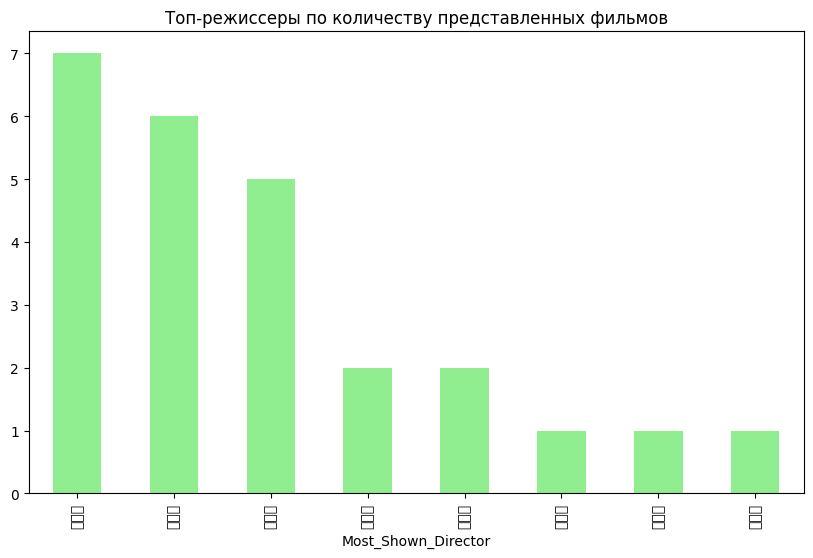

In [45]:
plt.figure(figsize=(10, 6))
yearly_aw['Most_Shown_Director'].value_counts().plot(kind='bar', color='lightgreen', title='Топ-режиссеры по количеству представленных фильмов')
plt.yticks(fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Имя режиссера", labelpad=25)
plt.ylabel("Кол-во лет в топе", labelpad=25)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

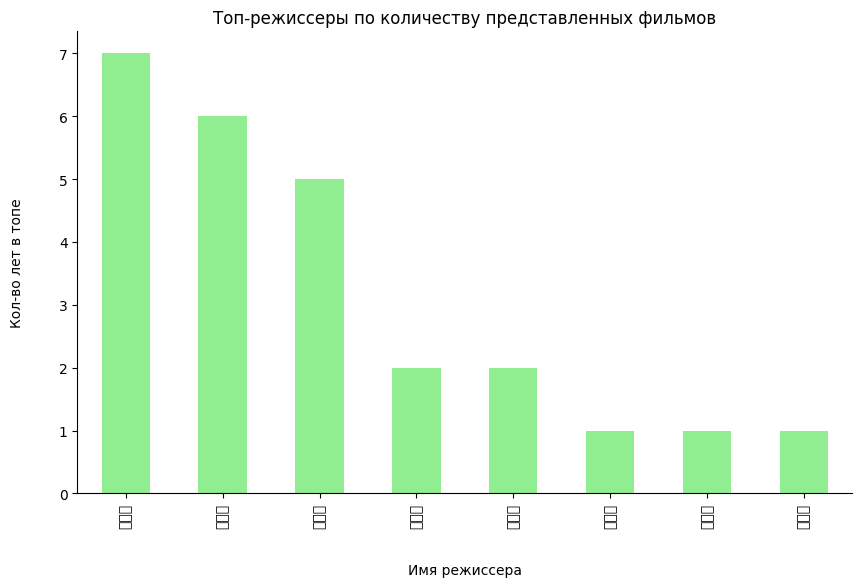

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_prop = fm.FontProperties('/Users/xexinette/Library/Fonts/NanumGothicRegular.ttf')

plt.figure(figsize=(10, 6))
yearly_aw['Most_Shown_Director'].value_counts().plot(kind='bar', color='lightgreen', title='Топ-режиссеры по количеству представленных фильмов')
plt.yticks(fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Имя режиссера", labelpad=25)
plt.ylabel("Кол-во лет в топе", labelpad=25)
plt.show()

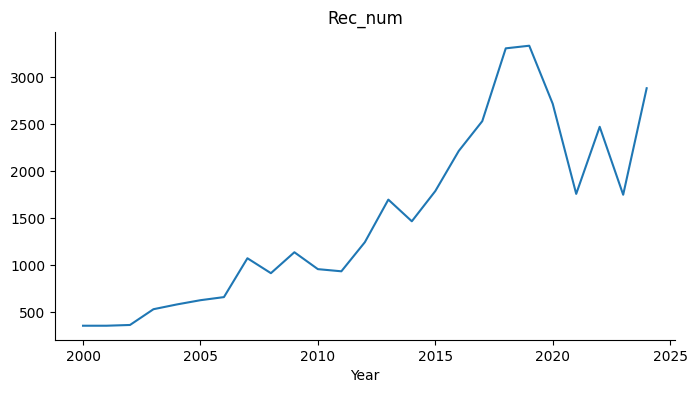

In [47]:
yearly_aw['Rec_num'].plot(kind='line', figsize=(8, 4), title='Rec_num')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='BDA_Share', ylabel='Fest_Unum'>

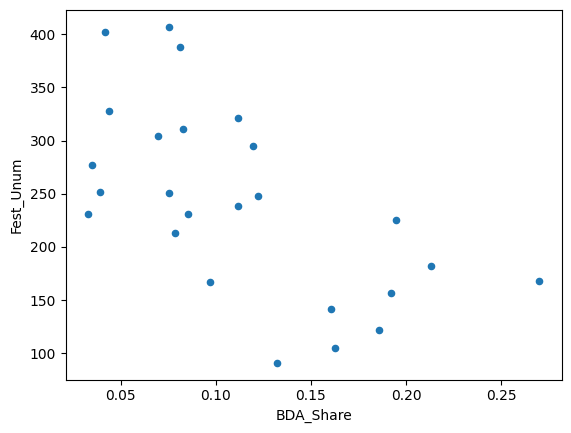

In [48]:
yearly_aw.plot('BDA_Share', 'Fest_Unum', kind = "scatter")

<Axes: xlabel='Rec_num', ylabel='Film_UNnum'>

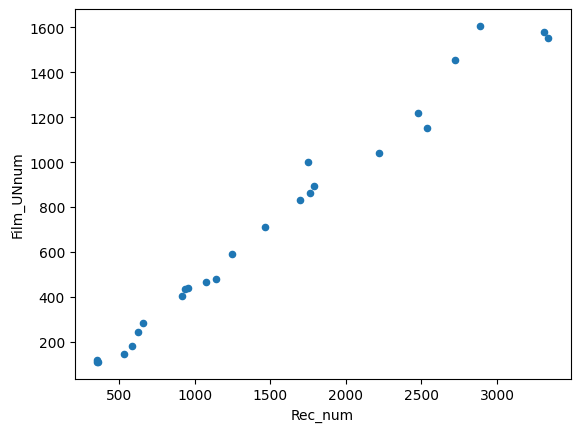

In [49]:
yearly_aw.plot('Rec_num', 'Film_UNnum', kind = "scatter")


In [50]:
yearly_aw.head()

,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085
2002,96,86,0.895833,362,105,110,이창동,19,14,0.736842,0.162791,김기덕,48,0.436364
2003,135,108,0.800000,530,182,147,봉준호,31,23,0.741935,0.212963,봉준호,31,0.210884
2004,153,126,0.823529,581,168,183,박찬욱,52,34,0.653846,0.269841,김기덕,54,0.295082


<Axes: ylabel='Frequency'>

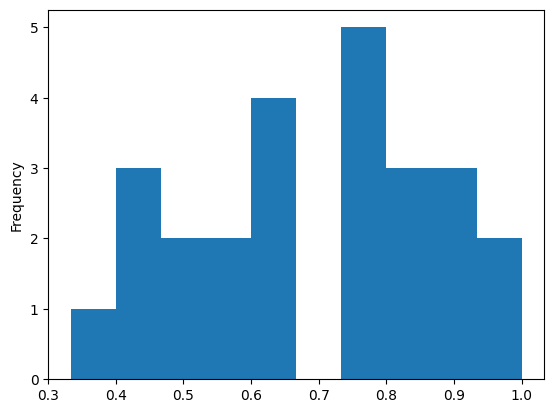

In [51]:
yearly_aw['BDALL_AW_Ration'].plot(kind='hist')

## **Формулировка и проверка гипотез**

In [52]:
# посмотрим корреляции между кол-вом записей (Rec_num), кол-вом уникальных фильмов (Film_UNnum) и фестивалей (Fest_Unum)
# гипотеза такова, что чем больше фестивалей проводится, тем больше в них участвуют корейские фильмы,тем больше записей и наоборот
# т.е. предположительно между этими данными существует прямая линейная взаимосвязь
print(f'Корелляция между кол-вом записей и кол-вом уникальных фильмов: {yearly_aw["Rec_num"].corr(yearly_aw["Film_UNnum"])}')
print(f'Корелляция между кол-вом записей и кол-вом уникальных фестивалей: {yearly_aw["Rec_num"].corr(yearly_aw["Fest_Unum"])}')
print(f'Корелляция между кол-вом уникальных фильмов и кол-вом уникальных фестивалей: {yearly_aw["Film_UNnum"].corr(yearly_aw["Fest_Unum"])}')

Корелляция между кол-вом записей и кол-вом уникальных фильмов: 0.9908312383420241
Корелляция между кол-вом записей и кол-вом уникальных фестивалей: 0.867568905169004
Корелляция между кол-вом уникальных фильмов и кол-вом уникальных фестивалей: 0.837606262355779


<Axes: xlabel='Rec_num', ylabel='Film_UNnum'>

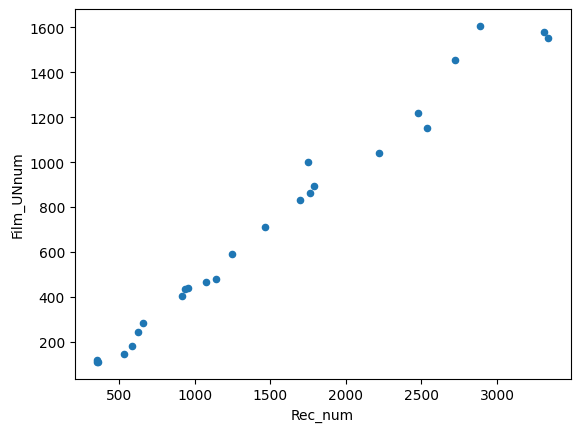

In [54]:
yearly_aw.plot('Rec_num', 'Film_UNnum', kind = "scatter")

<Axes: xlabel='Rec_num', ylabel='Fest_Unum'>

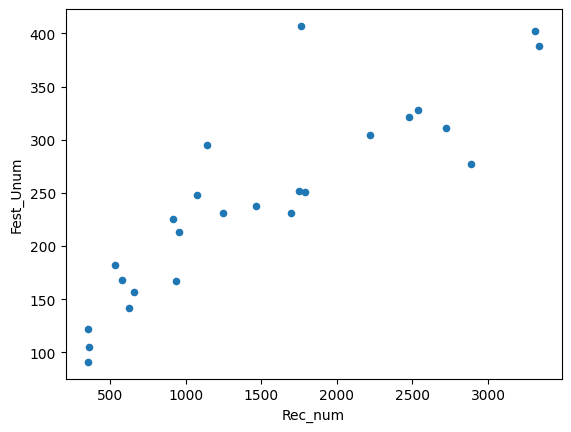

In [55]:
yearly_aw.plot('Rec_num', 'Fest_Unum', kind = "scatter")

<Axes: xlabel='Film_UNnum', ylabel='Fest_Unum'>

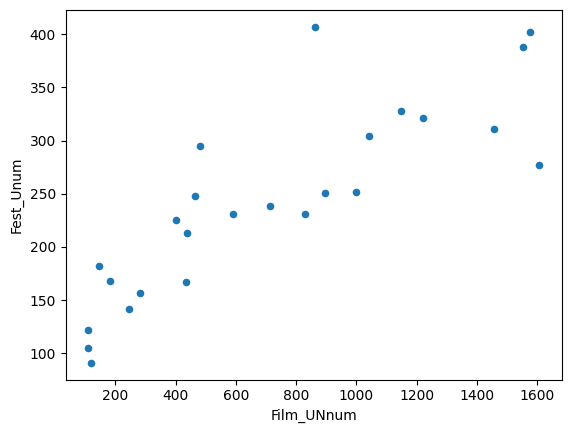

In [56]:
yearly_aw.plot('Film_UNnum', 'Fest_Unum', kind = "scatter")

In [57]:
# посмотрим корреляции между кол-вом записей об участии лучшего режиссера в фестивалях(BDAll_num) и кол-вом доли успеха (BDALL_AW_Ration)
# гипотеза такова, что чем большее кол-во фестивалей, в которых принимает участие автор, тем меньше доля побед в них
# т.е. предположительно между этими данными существует обратная линейная взаимосвязь
print(yearly_aw['BDAll_num'].corr(yearly_aw['BDALL_AW_Ration']))


-0.5459916780286845


<Axes: xlabel='BDAll_num', ylabel='BDALL_AW_Ration'>

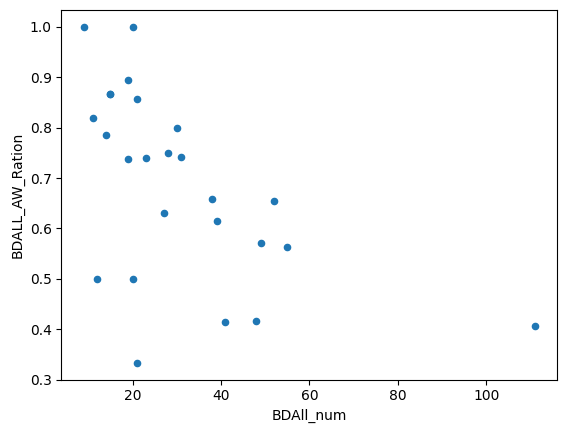

In [58]:
yearly_aw.plot('BDAll_num', 'BDALL_AW_Ration', kind = "scatter")

In [59]:
yearly_aw.head()

,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085
2002,96,86,0.895833,362,105,110,이창동,19,14,0.736842,0.162791,김기덕,48,0.436364
2003,135,108,0.800000,530,182,147,봉준호,31,23,0.741935,0.212963,봉준호,31,0.210884
2004,153,126,0.823529,581,168,183,박찬욱,52,34,0.653846,0.269841,김기덕,54,0.295082


**Гипотеза:**
Чем больше корейские фильмы участвуют в фестивалях, тем больше награл они получают

In [60]:
print(yearly_aw['Winners'].corr(yearly_aw['Rec_num']))

0.87876822892465


<Axes: xlabel='Winners', ylabel='Rec_num'>

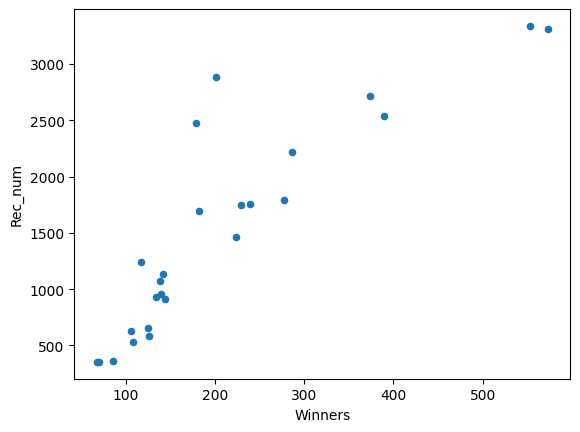

In [61]:
yearly_aw.plot('Winners', 'Rec_num', kind = "scatter")

## **Выводы**

### **ЗАКОНОМЕРНОСТИ**
>  **1. Международный интерес к южнокорейскому кино**

Международный интерес к южнокорейскому кино непрерывно рос с 2000 года, достигая своего пика в 2019 году, когда было зафиксировано наибольшее количество участий корейских фильмов в международных кинофестивалях. Однако после 2019 года наблюдается спад, что может быть связано с последствиями пандемии COVID-19, когда многие фестивали были отменены или перенесены, а съемки фильмов были приостановлены.





> **2. Растущее количество наград с увеличением представленных фильмов**

С увеличением числа фильмов, ежегодно представленных на кинофестивалях, наблюдается и рост количества наград, которые они получают. Это свидетельствует о повышении качества южнокорейского кинематографа и признания международным сообществом. Количество наград продолжает расти, что подтверждает интерес к произведениям корейских режиссеров и артистов.





> **3. Корейское кино продолжает получать признание в мире**

Тенденция роста участия корейских фильмов в международных кинофестивалях и количество наград, которые они получают, подтверждает, что корейский кинематограф продолжает занимать важное место на мировой киноарене. Награды и признание на международных фестивалях становятся стимулом для новых поколений режиссеров и актеров, вдохновляя их на создание высококачественного контента.





> **4. Корреляция между лучшими режиссерами и числом наград**

Есть также положительная корреляция между количеством наград, получаемых фильмами, и режиссерами, которые входят в список топовых. Это подтверждает гипотезу, что лучшие режиссеры получают больше признания на международных фестивалях, а их фильмы часто становятся победителями. Например, режиссеры, такие как Пон Чжунхо и Хон Сансу, демонстрируют высокие результаты как по числу фильмов, так и по количеству наград.




> **5. Зависимость успеха режиссера от участия в фестивалях**

Режиссеры, чьи фильмы чаще участвуют в международных фестивалях, чаще оказываются в числе победителей. Это подтверждает теорию, что постоянное участие в международных кинофестивалях увеличивает шанс на получение наград, что связано с более широким распространением фильмов и их дальнейшей популярностью.



---

### **АНОМАЛИИ**
1. Самая значительная аномалия наблюдается в 2020-2021 годах, когда произошел резкий спад в числе участников и наград, что можно объяснить пандемией COVID-19. Это событие вызвало массовые отмены и переносы кинофестивалей, а также приостановку съемок и ограничение международных поездок. В этот период многие фильмы не были представлены на фестивалях, и это также повлияло на нормативные ожидания по наградам и количеству показов. Эта аномалия требует особого внимания при анализе данных, так как она искажает тренды, характерные для других лет.

2. Неравномерное распределение наград среди режиссеров. Хотя в целом существует корреляция между участием в фестивалях и получением наград, есть отклонения. Например, режиссеры, чьи фильмы регулярно участвуют в фестивалях, не всегда получают награды в той же пропорции. Это может указывать на погрешности в оценке качества фильмов или на влияние субъективности жюри на результаты. Такие аномалии могут повлиять на точность прогнозирования успеха фильмов на фестивалях и требуют дополнительного анализа для выявления причин.



---
### **ВЛИЯНИЕ НА ДАЛЬНЕЙШИЙ АНАЛИЗ**
* Аномалии, такие как падение активности в 2020-2021 годах, требуют специального учета в дальнейших анализах. Необходимо либо исключать эти годы из анализа трендов, либо проводить их анализ с учетом специфики этих лет.

* Фильтрация данных и удаление выбросов поможет сделать анализ более точным и исключить влияние экстремальных факторов.

* Если при анализе данных о режиссерах и фильмах в рамках ежегодных трендов наблюдаются аномалии, это может повлиять на стратегические выводы о развитии индустрии, трендах и предпочтениях зрителей. Важно корректно учитывать такие аномалии, чтобы предсказать будущие тенденции более точно.
